# Constant-pressure, adiabatic kinetics simulation


In [2]:
import numpy as np
import pandas as pd
import cantera as ct
import matplotlib.pyplot as plt

In [3]:
gas = ct.Solution('input/han.cti')

In [4]:
#troubleshooting: Find rate equations that may give k < 0
gas.TPX = 600, ct.one_atm, 'H4N2O2(2):0.14, NH2OH(3):0.3, HNO3(4):0.3, CH3OH(5):0.16, H2O(6):0.04'
print(np.nonzero(np.isnan(gas.forward_rate_constants)))

(array([], dtype=int64),)


In [5]:
print("\n".join(sorted(species.name for species in gas.species())))

C2H4(21)
C2H5(17)
C2H6(12)
C3H8(15)
CH2(S)(40)
CH2O(13)
CH2O(917)
CH2OH(42)
CH3(14)
CH3CHO(19)
CH3O(43)
CH3OH(5)
CH4(24)
CO(11)
CO2(9)
CON(737)
COON(959)
H(16)
H2(10)
H2N2(506)
H2N2(507)
H2N2O(384)
H2N2O(387)
H2N2O(966)
H2NN(98)
H2NO(86)
H2NO2(197)
H2NO2(437)
H2NO2(603)
H2NO3(246)
H2NO3(247)
H2NO3(724)
H2NO4(270)
H2NO4(271)
H2NO5(478)
H2O(6)
H2O2(37)
H3N2(508)
H3N2O(195)
H3N2O(385)
H3N2O(386)
H3N2O(388)
H3NO(716)
H3NO2(469)
H3NO2(612)
H4N2O(395)
H4N2O2(2)
H6N4O(549)
HCO(18)
HN2O5(783)
HN2O5(784)
HN2O5(785)
HNO(382)
HNO(85)
HNO2(618)
HNO2(6599)
HNO2(780)
HNO2(781)
HNO2(95)
HNO3(200)
HNO3(4)
HNOH(94)
HNOO(619)
HO2(36)
HONO(91)
N2(7)
N2H2(97)
N2H3(99)
N2H4(100)
NH(84)
NH2(82)
NH2NO(381)
NH2OH(3)
NH3(83)
NH3NH(513)
NNO(394)
NNONN(547)
NNOON(748)
NO(89)
NO2(777)
NO2(92)
NO3(1399)
NO3(96)
NOCO(909)
NOHJJ(452)
NON(765)
NONN(610)
NONO(752)
NONOO(766)
NOON(774)
Ne
O(33)
O2(8)
OH(20)
S(1009)
S(1037)
S(1039)
S(1047)
S(1077)
S(1082)
S(1129)
S(1130)
S(1131)
S(1132)
S(1142)
S(1234)
S(125)
S(1300)
S(

In [6]:
temp = 600
pres = ct.one_atm
comp = 'H4N2O2(2):0.14, NH2OH(3):0.3, HNO3(4):0.3, CH3OH(5):0.16, H2O(6):0.04'

# Now with sensitivity

In [7]:
print("\n".join(f"{gas.species(i).name}, {x}" for i, x in enumerate(gas.X)))

Ne, 0.0
H4N2O2(2), 0.14893617021276598
NH2OH(3), 0.3191489361702127
HNO3(4), 0.3191489361702127
CH3OH(5), 0.1702127659574468
H2O(6), 0.0425531914893617
N2(7), 0.0
O2(8), 0.0
CO2(9), 0.0
H2(10), 0.0
CO(11), 0.0
C2H6(12), 0.0
CH2O(13), 0.0
CH3(14), 0.0
C3H8(15), 0.0
H(16), 0.0
C2H5(17), 0.0
HCO(18), 0.0
CH3CHO(19), 0.0
OH(20), 0.0
C2H4(21), 0.0
CH4(24), 0.0
O(33), 0.0
HO2(36), 0.0
H2O2(37), 0.0
CH2(S)(40), 0.0
CH2OH(42), 0.0
CH3O(43), 0.0
NH2(82), 0.0
NH3(83), 0.0
NH(84), 0.0
HNO(85), 0.0
H2NO(86), 0.0
NO(89), 0.0
HONO(91), 0.0
NO2(92), 0.0
HNOH(94), 0.0
HNO2(95), 0.0
NO3(96), 0.0
N2H2(97), 0.0
H2NN(98), 0.0
N2H3(99), 0.0
N2H4(100), 0.0
S(125), 0.0
S(131), 0.0
S(132), 0.0
H3N2O(195), 0.0
S(196), 0.0
H2NO2(197), 0.0
S(198), 0.0
S(199), 0.0
HNO3(200), 0.0
H2NO3(246), 0.0
H2NO3(247), 0.0
S(258), 0.0
S(265), 0.0
H2NO4(270), 0.0
H2NO4(271), 0.0
NH2NO(381), 0.0
HNO(382), 0.0
H2N2O(384), 0.0
H3N2O(385), 0.0
H3N2O(386), 0.0
H2N2O(387), 0.0
H3N2O(388), 0.0
NNO(394), 0.0
H4N2O(395), 0.0
S(396), 0.

In [8]:
# Reset the simulation, now with Sensitivity
gas.TPX = temp, pres, comp
r = ct.IdealGasConstPressureReactor(gas, name='R1')
sim = ct.ReactorNet([r])
    
# set the tolerances for the solution and for the sensitivity coefficients
sim.rtol = 1.0e-6
sim.atol = 1.0e-15
sim.rtol_sensitivity = 1.0e-6
sim.atol_sensitivity = 1.0e-6

In [9]:
# enable sensitivity with respect to the rates of some reactions
sensitive_reactions = range(0,100)
print("Turining on sensitivity for these reactions:")
print(list(sensitive_reactions))
for i,rxn in enumerate(sensitive_reactions):
    r.add_sensitivity_reaction(rxn)
    print(sim.sensitivity_parameter_name(i))
    print(" " * 4 + gas.reaction_equation(rxn))

Turining on sensitivity for these reactions:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
R1: CH2O(13) (+M) <=> CO(11) + H2(10) (+M)
    CH2O(13) (+M) <=> CO(11) + H2(10) (+M)
R1: 2 CH3(14) (+M) <=> C2H6(12) (+M)
    2 CH3(14) (+M) <=> C2H6(12) (+M)
R1: H2(10) + M <=> 2 H(16) + M
    H2(10) + M <=> 2 H(16) + M
R1: CH2O(13) + H(16) <=> CO(11) + H(16) + H2(10)
    CH2O(13) + H(16) <=> CO(11) + H(16) + H2(10)
R1: 2 H(16) + N2(7) <=> H2(10) + N2(7)
    2 H(16) + N2(7) <=> H2(10) + N2(7)
R1: 2 H(16) + H2(10) <=> 2 H2(10)
    2 H(16) + H2(10) <=> 2 H2(10)
R1: 2 H(16) + H2O(6) <=> H2(10) + H2O(6)
    2 H(16) + H2O(6) <=> H2(10) + H2O(6)
R1: 2 CH3(14) <=

In [10]:
sensitivity_labels = ['s{}'.format(i) for i in sensitive_reactions]
', '.join(sensitivity_labels)

's0, s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15, s16, s17, s18, s19, s20, s21, s22, s23, s24, s25, s26, s27, s28, s29, s30, s31, s32, s33, s34, s35, s36, s37, s38, s39, s40, s41, s42, s43, s44, s45, s46, s47, s48, s49, s50, s51, s52, s53, s54, s55, s56, s57, s58, s59, s60, s61, s62, s63, s64, s65, s66, s67, s68, s69, s70, s71, s72, s73, s74, s75, s76, s77, s78, s79, s80, s81, s82, s83, s84, s85, s86, s87, s88, s89, s90, s91, s92, s93, s94, s95, s96, s97, s98, s99'

In [11]:
sensitive_species = "CH3OH(5)"

In [12]:
states = ct.SolutionArray(gas, extra=['t'] + sensitivity_labels)

for t in np.arange(0, 2e-3, 5e-6):
    sim.advance(t)
    sensitivity_dict = {}
    for i, label in enumerate(sensitivity_labels):
        # sensitivity of sensitive_species to parameter i which is reaction sensitive_reactions[i]
        sensitivity_dict[label] = sim.sensitivity(sensitive_species, i)
    states.append(r.thermo.state, t=1000*t, **sensitivity_dict)

    print(f"{sim.time:10.3e} {r.T:10.3f} {r.thermo.P:10.3f} {r.thermo.u:14.6e} {r.volume:}")

 0.000e+00    600.000 101325.000  -1.555097e+06 1.0
 5.000e-06   1302.057 101325.000  -1.788822e+06 3.174393215140523
 1.000e-05   1758.202 101325.000  -2.081334e+06 5.895708293826815
 1.500e-05   1931.792 101325.000  -2.188504e+06 6.892743725035743
 2.000e-05   2029.180 101325.000  -2.240150e+06 7.3732223972103945
 2.500e-05   2045.280 101325.000  -2.247906e+06 7.445374499727608
 3.000e-05   2051.199 101325.000  -2.250693e+06 7.471308284035995
 3.500e-05   2054.630 101325.000  -2.252322e+06 7.486460364480577
 4.000e-05   2057.011 101325.000  -2.253456e+06 7.497006794520305
 4.500e-05   2058.861 101325.000  -2.254336e+06 7.505196524338722
 5.000e-05   2060.415 101325.000  -2.255074e+06 7.5120587235728316
 5.500e-05   2061.794 101325.000  -2.255726e+06 7.518129470911626
 6.000e-05   2063.066 101325.000  -2.256326e+06 7.52371021886654
 6.500e-05   2064.271 101325.000  -2.256892e+06 7.5289784048688
 7.000e-05   2065.435 101325.000  -2.257436e+06 7.534041844357245
 7.500e-05   2066.570 101

 6.250e-04   2217.280 101325.000  -2.329021e+06 8.200008509494552
 6.300e-04   2217.999 101325.000  -2.329427e+06 8.203787548003518
 6.350e-04   2218.666 101325.000  -2.329810e+06 8.207350942990095
 6.400e-04   2219.283 101325.000  -2.330170e+06 8.210700858728323
 6.450e-04   2219.850 101325.000  -2.330507e+06 8.213840697460446
 6.500e-04   2220.369 101325.000  -2.330823e+06 8.21677506327631
 6.550e-04   2220.843 101325.000  -2.331117e+06 8.219509705529774
 6.600e-04   2221.272 101325.000  -2.331390e+06 8.222051427741897
 6.650e-04   2221.661 101325.000  -2.331643e+06 8.224407978314941
 6.700e-04   2222.010 101325.000  -2.331878e+06 8.22658793915706
 6.750e-04   2222.323 101325.000  -2.332094e+06 8.228600599606969
 6.800e-04   2222.603 101325.000  -2.332293e+06 8.230455808332007
 6.850e-04   2222.852 101325.000  -2.332477e+06 8.23216382601547
 6.900e-04   2223.073 101325.000  -2.332646e+06 8.233735182758393
 6.950e-04   2223.270 101325.000  -2.332801e+06 8.235180535752804
 7.000e-04   

 1.315e-03   2246.668 101325.000  -2.342215e+06 8.322757163036325
 1.320e-03   2246.897 101325.000  -2.342294e+06 8.323492561216117
 1.325e-03   2247.125 101325.000  -2.342373e+06 8.324228561498732
 1.330e-03   2247.354 101325.000  -2.342452e+06 8.324965164199737
 1.335e-03   2247.583 101325.000  -2.342531e+06 8.325702369646457
 1.340e-03   2247.813 101325.000  -2.342611e+06 8.32644017819208
 1.345e-03   2248.042 101325.000  -2.342690e+06 8.327178590191664
 1.350e-03   2248.272 101325.000  -2.342769e+06 8.327917606010281
 1.355e-03   2248.502 101325.000  -2.342849e+06 8.328657226021827
 1.360e-03   2248.732 101325.000  -2.342928e+06 8.329397450608596
 1.365e-03   2248.962 101325.000  -2.343008e+06 8.330138280166667
 1.370e-03   2249.193 101325.000  -2.343088e+06 8.330879715090932
 1.375e-03   2249.424 101325.000  -2.343168e+06 8.331621755789875
 1.380e-03   2249.655 101325.000  -2.343247e+06 8.3323644026721
 1.385e-03   2249.886 101325.000  -2.343327e+06 8.333107656152626
 1.390e-03   

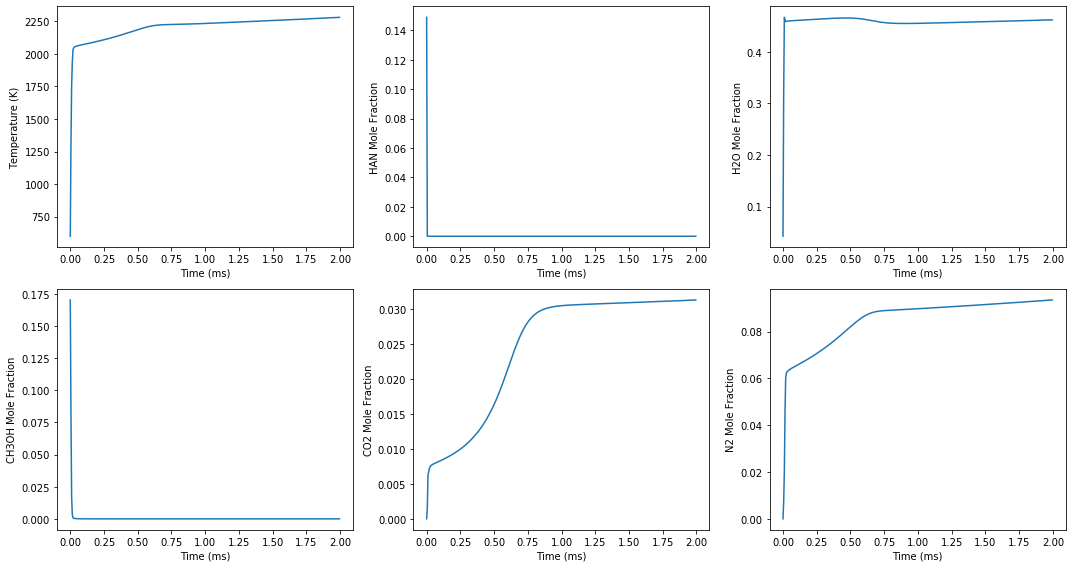

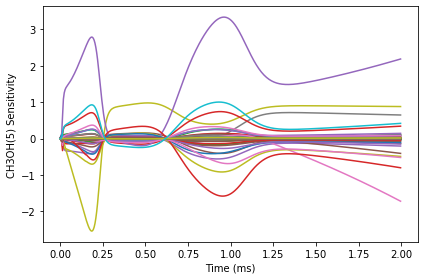

In [13]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 8))
ax1.plot(states.t, states.T)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Temperature (K)')

ax2.plot(states.t, states('H4N2O2(2)').X)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('HAN Mole Fraction')

ax3.plot(states.t, states('H2O(6)').X)
ax3.set_xlabel('Time (ms)')
ax3.set_ylabel('H2O Mole Fraction')

ax4.plot(states.t, states('CH3OH(5)').X)
ax4.set_xlabel('Time (ms)')
ax4.set_ylabel('CH3OH Mole Fraction')

ax5.plot(states.t, states('CO2(9)').X)
ax5.set_xlabel('Time (ms)')
ax5.set_ylabel('CO2 Mole Fraction')

ax6.plot(states.t, states('N2(7)').X)
ax6.set_xlabel('Time (ms)')
ax6.set_ylabel('N2 Mole Fraction')

fig.tight_layout()

plt.figure(2)
for i, label in enumerate(sensitivity_labels):
    plt.plot(states.t, getattr(states, label), '-', label=sim.sensitivity_parameter_name(i) )
plt.xlabel('Time (ms)')
plt.ylabel(f"{sensitive_species} Sensitivity")
plt.tight_layout()
plt.show()

In [14]:
my_list = []
for i, label in enumerate(sensitivity_labels):
    times = states.t, 
    sensitivities = getattr(states, label)
    label = sim.sensitivity_parameter_name(i)
    maximum = np.max(np.abs(sensitivities))
    my_list.append((maximum, label))

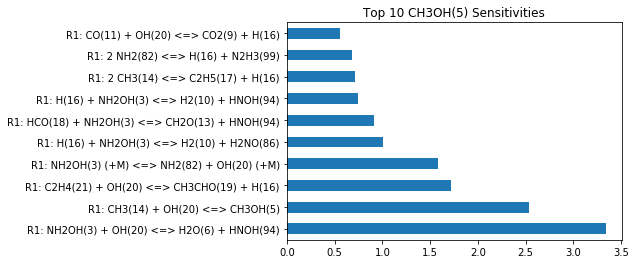

In [15]:
top_n = 10
top_sens = sorted(my_list, key=lambda x:x[0], reverse=True)[:top_n]
sens, labels = zip(*top_sens)
sens_series = pd.Series(sens, index=labels)
sens_series.plot.barh(title=f"Top {top_n} {sensitive_species} Sensitivities")

In [16]:
gas_phase_only_states = states

## Now with surface reactions

In [17]:
# Reset the simulation, now with Sensitivity

# unit conversion factors to SI
cm = 0.01
minute = 60.0

#######################################################################
# Input Parameters
#######################################################################

gas.TPX = temp, pres, comp

## CATALYST 

length = 0.3 * cm  # Catalyst bed length
area = 1.0 * cm**2  # Catalyst bed area
cat_area_per_vol = 1e6 * 1000.0 / cm  # Catalyst particle surface area per unit volume
porosity = 0.3  # Catalyst bed porosity
rlen = length
rvol = area * rlen * porosity
# catalyst area in one reactor
cat_area = cat_area_per_vol * rvol

# import the surface model
surf = ct.Interface('chem_annotated.cti','surface1', [gas])
surf.TP = temp, pres

# Make the reactor
r = ct.IdealGasConstPressureReactor(gas, name='R1', energy='on')

# Add the reacting surface to the reactor. 
# The area is set to the desired catalyst area in the reactor.
rsurf = ct.ReactorSurface(surf, r, A=cat_area)

sim.reinitialize() 
sim = ct.ReactorNet([r])
    
# set the tolerances for the solution and for the sensitivity coefficients
sim.rtol = 1.0e-6
sim.atol = 1.0e-15
sim.rtol_sensitivity = 1.0e-6
sim.atol_sensitivity = 1.0e-6

In [18]:
gas.n_reactions, surf.n_reactions

(4953, 266)

In [19]:
r.kinetics.n_reactions

4953

In [20]:
#troubleshooting
print(gas.reaction_equation(1))

2 CH3(14) (+M) <=> C2H6(12) (+M)


In [21]:
# enable sensitivity with respect to the rates of some reactions
sensitive_reactions = list(range(0,50))
print("Turning on sensitivity for these reactions:")
print(sensitive_reactions)
for i, rxn in enumerate(sensitive_reactions):
    r.add_sensitivity_reaction(rxn)
    print(sim.sensitivity_parameter_name(i))
    print(" " * 4 + gas.reaction_equation(rxn))

Turning on sensitivity for these reactions:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
R1: CH2O(13) (+M) <=> CO(11) + H2(10) (+M)
    CH2O(13) (+M) <=> CO(11) + H2(10) (+M)
R1: 2 CH3(14) (+M) <=> C2H6(12) (+M)
    2 CH3(14) (+M) <=> C2H6(12) (+M)
R1: H2(10) + M <=> 2 H(16) + M
    H2(10) + M <=> 2 H(16) + M
R1: CH2O(13) + H(16) <=> CO(11) + H(16) + H2(10)
    CH2O(13) + H(16) <=> CO(11) + H(16) + H2(10)
R1: 2 H(16) + N2(7) <=> H2(10) + N2(7)
    2 H(16) + N2(7) <=> H2(10) + N2(7)
R1: 2 H(16) + H2(10) <=> 2 H2(10)
    2 H(16) + H2(10) <=> 2 H2(10)
R1: 2 H(16) + H2O(6) <=> H2(10) + H2O(6)
    2 H(16) + H2O(6) <=> H2(10) + H2O(6)
R1: 2 CH3(14) <=> C2H5(17) + H(16)
    2 CH3(14) <=> C2H5(17) + H(16)
R1: C2H6(12) + H(16) <=> C2H5(17) + H2(10)
    C2H6(12) + H(16) <=> C2H5(17) + H2(10)
R1: C2H6(12) + H(16) <=> C2H5(17) + H2(10)
    C2H6(12) + H(1

In [22]:
sensitivity_labels = ['s{}'.format(i) for i in sensitive_reactions]
', '.join(sensitivity_labels)

's0, s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15, s16, s17, s18, s19, s20, s21, s22, s23, s24, s25, s26, s27, s28, s29, s30, s31, s32, s33, s34, s35, s36, s37, s38, s39, s40, s41, s42, s43, s44, s45, s46, s47, s48, s49'

In [23]:
sensitive_species = "CH3OH(5)"

In [24]:
states = ct.SolutionArray(gas, extra=['t'] + sensitivity_labels)
for t in np.arange(0, 2e-3, 5e-6):
    sim.advance(t)
    sensitivity_dict = {}
    volumedict = {}
    for i, label in enumerate(sensitivity_labels):
        # sensitivity of OH to parameter i which is reaction sensitive_reactions[i]
        sensitivity_dict[label] = sim.sensitivity(sensitive_species, i)
    states.append(r.thermo.state, t=1000*t, **sensitivity_dict)

    f"{sim.time:10.3e} {r.T:10.3f} {r.thermo.P:10.3f} {r.thermo.u:14.6e} {r.volume:14.6e}"

In [25]:
#troubleshooting
print(sensitivity_dict.keys())

dict_keys(['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's39', 's40', 's41', 's42', 's43', 's44', 's45', 's46', 's47', 's48', 's49'])


In [48]:
#troubleshooting
print(np.nonzero(np.isnan(gas.forward_rate_constants)))

(array([], dtype=int64),)


In [49]:
#troubleshooting
sim.component_name(183)

'R1: *NO(218)'

In [ ]:
#troubleshooting, see if thermo data is continuous
sp = gas.species(195)
T = np.linspace(600, 3000, 200)
f,ax = plt.subplots(1,3, figsize=(8,3.5))

def plot_thermo(thermo):
    h = [thermo.h(tt)/(ct.gas_constant * tt) for tt in T]
    cp = [thermo.cp(tt)/ct.gas_constant for tt in T]
    s = [thermo.s(tt)/ct.gas_constant for tt in T]
    ax[0].plot(T,cp)
    ax[0].set_title('$c_p/R$')
    ax[1].plot(T,h)
    ax[1].set_title('$h/RT$')
    ax[2].plot(T,s)
    ax[2].set_title('$s/R$')
plot_thermo(sp.thermo)



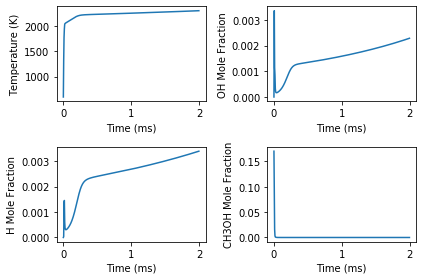

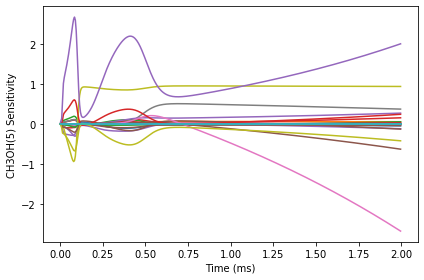

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(states.t, states.T)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Temperature (K)')

ax2.plot(states.t, states('OH(20)').X)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('OH Mole Fraction')

ax3.plot(states.t, states('H(16)').X)
ax3.set_xlabel('Time (ms)')
ax3.set_ylabel('H Mole Fraction')

ax4.plot(states.t, states('CH3OH(5)').X)
ax4.set_xlabel('Time (ms)')
ax4.set_ylabel('CH3OH Mole Fraction')

fig.tight_layout()

plt.figure(2)
for i, label in enumerate(sensitivity_labels):
    plt.plot(states.t, getattr(states, label), '-', label=sim.sensitivity_parameter_name(i) )
#plt.legend(loc='best')
plt.xlabel('Time (ms)')
plt.ylabel(f'{sensitive_species} Sensitivity')
plt.tight_layout()
plt.show()

In [27]:
my_list = []
for i, label in enumerate(sensitivity_labels):
    times = states.t, 
    sensitivities = getattr(states, label)
    label = sim.sensitivity_parameter_name(i)
    maximum = np.max(np.abs(sensitivities))
    my_list.append((maximum, label))

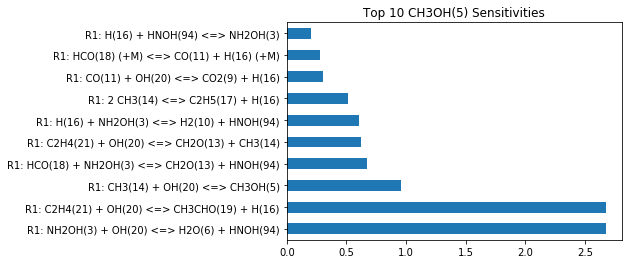

In [28]:
top_n = 10
top_sens = sorted(my_list, key=lambda x:x[0], reverse=True)[:top_n]
sens, labels = zip(*top_sens)
sens_series = pd.Series(sens, index=labels)
sens_series.plot.barh(title=f"Top {top_n} {sensitive_species} Sensitivities")

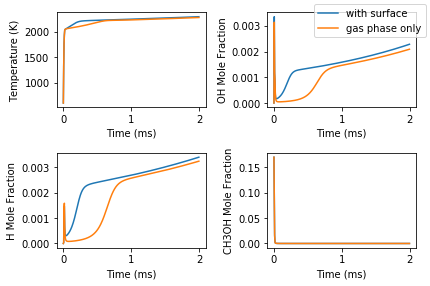

In [29]:
# Compare with gas phase only
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.plot(states.t, states.T)
ax1.plot(gas_phase_only_states.t, gas_phase_only_states.T)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Temperature (K)')

ax2.plot(states.t, states('OH(20)').X)
ax2.plot(gas_phase_only_states.t, gas_phase_only_states('OH(20)').X)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('OH Mole Fraction')

ax3.plot(states.t, states('H(16)').X)
ax3.plot(gas_phase_only_states.t, gas_phase_only_states('H(16)').X)
ax3.set_xlabel('Time (ms)')
ax3.set_ylabel('H Mole Fraction')


ax4.plot(states.t, states('CH3OH(5)').X)
ax4.plot(gas_phase_only_states.t, gas_phase_only_states('CH3OH(5)').X)
ax4.set_xlabel('Time (ms)')
ax4.set_ylabel('CH3OH Mole Fraction')

fig.legend(['with surface','gas phase only'])
fig.tight_layout()

# Sensitivity with surface reactions


In [30]:
# Reset the simulation, now with Sensitivity

# unit conversion factors to SI
cm = 0.01
minute = 60.0

#######################################################################
# Input Parameters
#######################################################################

gas.TPX = temp, pres, comp

## CATALYST 

length = 0.3 * cm  # Catalyst bed length
area = 1.0 * cm**2  # Catalyst bed area
cat_area_per_vol = 1e6 * 1000.0 / cm  # Catalyst particle surface area per unit volume
porosity = 0.3  # Catalyst bed porosity
rlen = length
rvol = area * rlen * porosity
# catalyst area in one reactor
cat_area = cat_area_per_vol * rvol

# import the surface model
surf = ct.Interface('chem_annotated.cti','surface1', [gas])
surf.TP = temp, pres

# Make the reactor
r = ct.IdealGasConstPressureReactor(gas, name='R1', energy='on')

# Add the reacting surface to the reactor. 
# The area is set to the desired catalyst area in the reactor.
rsurf = ct.ReactorSurface(surf, r, A=cat_area)

sim = ct.ReactorNet([r])
    
# set the tolerances for the solution and for the sensitivity coefficients
sim.rtol = 1.0e-6
sim.atol = 1.0e-15
sim.rtol_sensitivity = 1.0e-6
sim.atol_sensitivity = 1.0e-6

In [31]:
gas.n_reactions, surf.n_reactions

(4953, 266)

In [32]:
rsurf.kinetics.n_reactions

266

In [33]:
# enable sensitivity with respect to the rates of some reactions
sensitive_reactions = list(range(0, rsurf.kinetics.n_reactions))
print("Turining on sensitivity for these reactions:")
print(sensitive_reactions)
for i, rxn in enumerate(sensitive_reactions):
    rsurf.add_sensitivity_reaction(rxn)
    print(sim.sensitivity_parameter_name(i))
    print(surf.reaction_equation(rxn))

Turining on sensitivity for these reactions:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,

In [34]:
sensitivity_labels = ['s{}'.format(i) for i in sensitive_reactions]
', '.join(sensitivity_labels)

's0, s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15, s16, s17, s18, s19, s20, s21, s22, s23, s24, s25, s26, s27, s28, s29, s30, s31, s32, s33, s34, s35, s36, s37, s38, s39, s40, s41, s42, s43, s44, s45, s46, s47, s48, s49, s50, s51, s52, s53, s54, s55, s56, s57, s58, s59, s60, s61, s62, s63, s64, s65, s66, s67, s68, s69, s70, s71, s72, s73, s74, s75, s76, s77, s78, s79, s80, s81, s82, s83, s84, s85, s86, s87, s88, s89, s90, s91, s92, s93, s94, s95, s96, s97, s98, s99, s100, s101, s102, s103, s104, s105, s106, s107, s108, s109, s110, s111, s112, s113, s114, s115, s116, s117, s118, s119, s120, s121, s122, s123, s124, s125, s126, s127, s128, s129, s130, s131, s132, s133, s134, s135, s136, s137, s138, s139, s140, s141, s142, s143, s144, s145, s146, s147, s148, s149, s150, s151, s152, s153, s154, s155, s156, s157, s158, s159, s160, s161, s162, s163, s164, s165, s166, s167, s168, s169, s170, s171, s172, s173, s174, s175, s176, s177, s178, s179, s180, s181, s182, s183, s184,

In [35]:
sensitive_species = "CH3OH(5)"

In [36]:
states = ct.SolutionArray(gas, extra=['t'] + sensitivity_labels)

for t in np.arange(0, 1e-3, 5e-6):
    sim.advance(t)
    sensitivity_dict = {}
    for i, label in enumerate(sensitivity_labels):
        # sensitivity of OH to parameter i which is reaction sensitive_reactions[i]
        sensitivity_dict[label] = sim.sensitivity(sensitive_species, i)
    states.append(r.thermo.state, t=1000*t, **sensitivity_dict)

    print(f"{sim.time:10.3e} {r.T:10.3f} {r.thermo.P:10.3f} {r.thermo.u:14.6e}")

 0.000e+00    600.000 101325.000  -1.555097e+06
 5.000e-06   1317.031 101325.000  -1.798619e+06
 1.000e-05   1766.425 101325.000  -2.087116e+06
 1.500e-05   1940.079 101325.000  -2.192742e+06
 2.000e-05   2030.110 101325.000  -2.240363e+06
 2.500e-05   2043.555 101325.000  -2.247133e+06
 3.000e-05   2049.523 101325.000  -2.250195e+06
 3.500e-05   2054.229 101325.000  -2.252593e+06
 4.000e-05   2058.530 101325.000  -2.254738e+06
 4.500e-05   2062.670 101325.000  -2.256763e+06
 5.000e-05   2066.747 101325.000  -2.258728e+06
 5.500e-05   2070.809 101325.000  -2.260666e+06
 6.000e-05   2074.882 101325.000  -2.262598e+06
 6.500e-05   2078.981 101325.000  -2.264535e+06
 7.000e-05   2083.110 101325.000  -2.266484e+06
 7.500e-05   2087.275 101325.000  -2.268448e+06
 8.000e-05   2091.474 101325.000  -2.270430e+06
 8.500e-05   2095.707 101325.000  -2.272430e+06
 9.000e-05   2099.970 101325.000  -2.274447e+06
 9.500e-05   2104.259 101325.000  -2.276481e+06
 1.000e-04   2108.571 101325.000  -2.278

 9.350e-04   2243.775 101325.000  -2.341222e+06
 9.400e-04   2243.997 101325.000  -2.341299e+06
 9.450e-04   2244.219 101325.000  -2.341375e+06
 9.500e-04   2244.441 101325.000  -2.341452e+06
 9.550e-04   2244.663 101325.000  -2.341528e+06
 9.600e-04   2244.886 101325.000  -2.341605e+06
 9.650e-04   2245.108 101325.000  -2.341682e+06
 9.700e-04   2245.331 101325.000  -2.341759e+06
 9.750e-04   2245.554 101325.000  -2.341836e+06
 9.800e-04   2245.777 101325.000  -2.341913e+06
 9.850e-04   2246.001 101325.000  -2.341990e+06
 9.900e-04   2246.224 101325.000  -2.342067e+06
 9.950e-04   2246.448 101325.000  -2.342144e+06


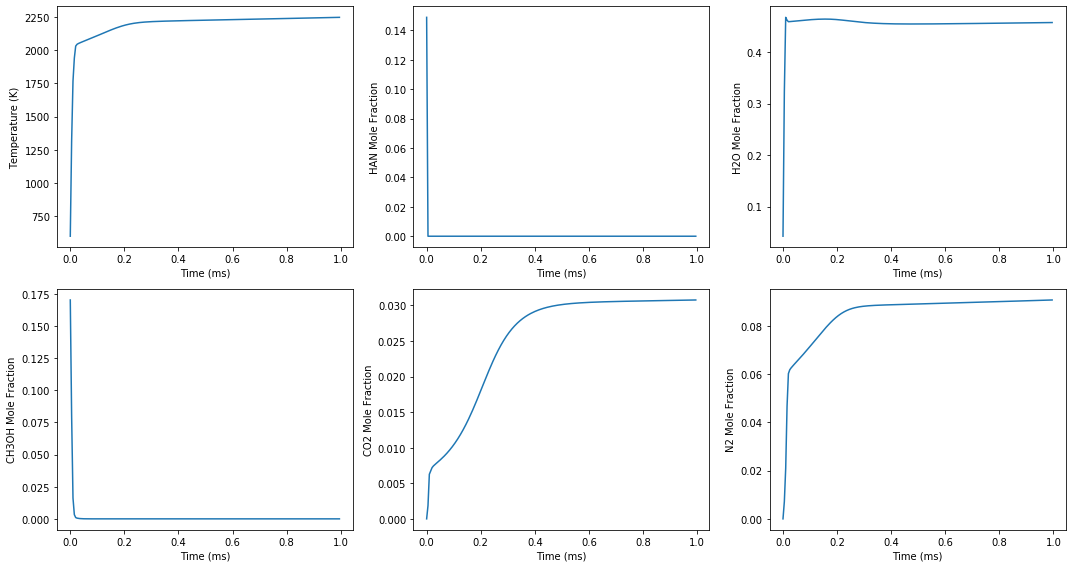

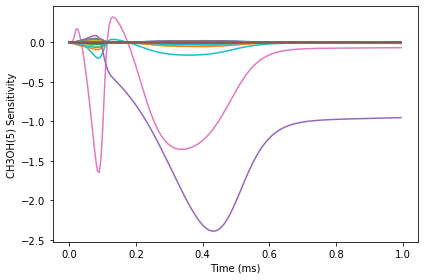

In [38]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 8))
ax1.plot(states.t, states.T)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Temperature (K)')

ax2.plot(states.t, states('H4N2O2(2)').X)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('HAN Mole Fraction')

ax3.plot(states.t, states('H2O(6)').X)
ax3.set_xlabel('Time (ms)')
ax3.set_ylabel('H2O Mole Fraction')

ax4.plot(states.t, states('CH3OH(5)').X)
ax4.set_xlabel('Time (ms)')
ax4.set_ylabel('CH3OH Mole Fraction')

ax5.plot(states.t, states('CO2(9)').X)
ax5.set_xlabel('Time (ms)')
ax5.set_ylabel('CO2 Mole Fraction')

ax6.plot(states.t, states('N2(7)').X)
ax6.set_xlabel('Time (ms)')
ax6.set_ylabel('N2 Mole Fraction')

fig.tight_layout()

plt.figure(2)
for i, label in enumerate(sensitivity_labels):
    plt.plot(states.t, getattr(states, label), '-', label=sim.sensitivity_parameter_name(i) )
plt.xlabel('Time (ms)')
plt.ylabel(f'{sensitive_species} Sensitivity')
plt.tight_layout()
# plt.legend()
plt.show()

In [39]:
my_list = []
for i, label in enumerate(sensitivity_labels):
    times = states.t, 
    sensitivities = getattr(states, label)
    label = sim.sensitivity_parameter_name(i)
    maximum = np.max(np.abs(sensitivities))
    my_list.append((maximum, label))

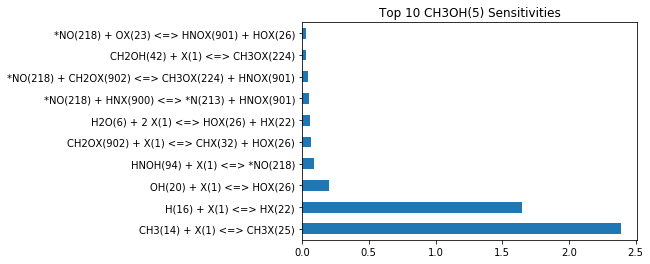

In [40]:
top_n = 10
top_sens = sorted(my_list, key=lambda x:x[0], reverse=True)[:top_n]
sens, labels = zip(*top_sens)
sens_series = pd.Series(sens, index=labels)
sens_series.plot.barh(title=f"Top {top_n} {sensitive_species} Sensitivities")